<a href="https://colab.research.google.com/github/aryaawcksn/Agwexy/blob/main/LSTM%20Article%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT DRIVE**

In [ ]:
from google.colab import drive

# mounting dataset dari gdrive
drive.mount('/content/gdrive', force_remount=True)

# lokasi dataset - ubah sesuai dengan lokasi anda mengupload folder datanya
root_path = 'gdrive/My Drive/Colab Notebooks/Deep Learning Labs/Skripsi lstm/'

# opsional - tampilkan info lokasi dataset
print("Path root:", root_path)

Mounted at /content/gdrive
Path root: gdrive/My Drive/Colab Notebooks/Deep Learning Labs/Skripsi lstm/


# **IMPORT LIBRARY**

In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
dataset_path = root_path + '/artikel.csv'  # Sesuaikan dengan nama file
df = pd.read_csv(dataset_path)

# **DATA VISUALISATION**

In [ ]:
print(df.head())
print(df['label'].value_counts())

                                               judul          label
0  Analisis Jaringan Saraf Tiruan untuk Prediksi ...  Ilmu Komputer
1  Pengaruh Pupuk Organik terhadap Pertumbuhan Ta...      Pertanian
2  Studi Spektroskopi Bintang Ganda di Galaksi An...      Astronomi
3    Rancang Bangun Aplikasi E-Learning Berbasis Web  Ilmu Komputer
4  Efektivitas Vaksin Covid-19 terhadap Mutasi Virus      Kesehatan
label
Ilmu Komputer    3
Pertanian        1
Astronomi        1
Kesehatan        1
Teknik Sipil     1
Biologi          1
Fisika           1
Ekonomi          1
Name: count, dtype: int64


# **TOKENIZER TEKS**

In [ ]:
# Tokenisasi teks
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# **PADDING**

In [ ]:
# Padding agar semua input sama panjang
max_seq_length = 200
X = pad_sequences(sequences, maxlen=max_seq_length)

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, padding='post', maxlen=100)

# **ENCODING**

In [ ]:
# Encode label ke numerik
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
categorical_labels = to_categorical(encoded_labels)
num_classes = categorical_labels.shape[1]

# **DATA SPLIT**

In [ ]:
# Split data train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **LSTM BASE MODEL**

In [100]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_shape=(max_seq_length,)))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 200, 64)        │         4,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,120 (164.53 KB)

 Trainable params: 42,120 (164.53 KB)

 Non-trainable params: 0 (0.00 B)

# **MODEL TRAINING**

In [101]:
checkpoint_path = 'gdrive/My Drive/Colab Notebooks/Deep Learning Labs/lstm_text_classification.h5'
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)

history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[checkpoint])

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1667 - loss: 2.0749
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to gdrive/My Drive/Colab Notebooks/Deep Learning Labs/lstm_text_classification.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.1667 - loss: 2.0749 - val_accuracy: 0.5000 - val_loss: 2.0692
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.1667 - loss: 2.0687
Epoch 2: val_accuracy did not improve from 0.50000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.1667 - loss: 2.0687 - val_accuracy: 0.5000 - val_loss: 2.0604
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.3333 - loss: 2.0630
Epoch 3: val_accuracy did not improve from 0.50000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.3333 - loss: 2.0630 - val_accuracy: 0.5000 - val_loss: 2.0527
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.5000 - loss: 2.0495
Epoch 4: val_accuracy did not improve from 0.50000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.5000 - loss: 2.0495 - val_accuracy: 0.0000e+00 - val_loss: 2.0457
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.3333 - loss: 2.0317
Epoch 5: val_accuracy did not improve from 0.50000


# **EVALUATION**

In [102]:
model = load_model(checkpoint_path)
loss, acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {acc:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step - accuracy: 0.0000e+00 - loss: 2.0960
Test Accuracy: 0.00


# **VISUALITION**

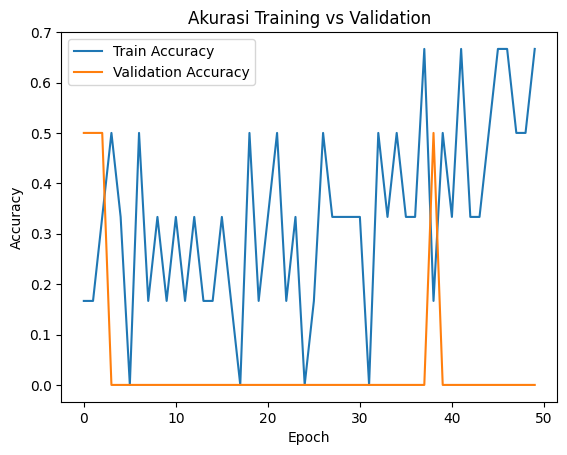

In [103]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Akurasi Training vs Validation")
plt.show()

In [113]:
def predict_label(text):
    # text: string (judul baru)
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=max_seq_length)

    pred_probs = model.predict(padded)
    pred_class = pred_probs.argmax(axis=1)
    pred_label = label_encoder.inverse_transform(pred_class)

    return pred_label[0]

judul_baru = "Efektivitas Vaksin Covid-19 terhadap Mutasi Virus"
label_prediksi = predict_label(judul_baru)
print(f'Judul: "{judul_baru}" diprediksi masuk ke label: {label_prediksi}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Judul: "Efektivitas Vaksin Covid-19 terhadap Mutasi Virus" diprediksi masuk ke label: Kesehatan
